# P11_survey

### Program to obtain the cross-tabulation of the P23 question (How relevant do you consider the competencies acquired during your graduate studies for integration into industry and innovation ecosystems?) vs kr (IT Industry 4.0 Knowledge) and the corresponding frequency distribution graph and Pearson correlation coefficient

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy import signal
from scipy.stats import norm
from scipy.stats import pearsonr
import statistics
import math
from pathlib import Path

Cross-Tab:
P23   2   3   4
kr             
2    25   0   0
3    25  22   0
4     0  16  21
5     0   0   3

Correlation coefficient of kr vs P23: 0.8081


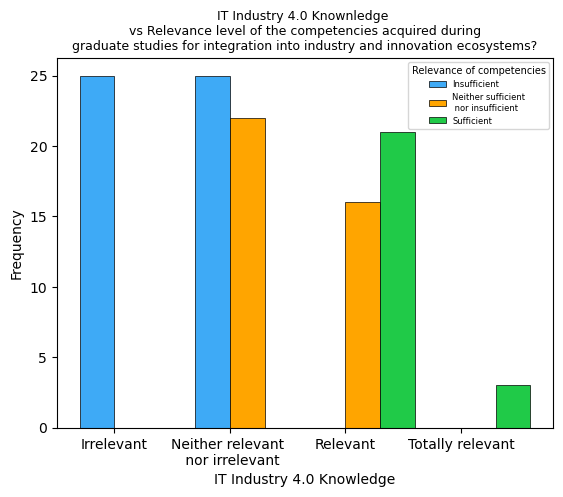

In [2]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Function to obtain the cross-tabulation, correlation coefficient, and frequency distribution graph
def analizar_columnas(df, col1, col2):
    # Map numeric values to descriptive labels
    competencies_map = {1: 'Totally irrelevant', 2: 'Irrelevant', 3: 'Neither relevant \n nor irrelevant', 4:'Relevant', 5:'Totally relevant'}
    progskills_map = {1: 'Totally insufficient', 2: 'Insufficient', 3: 'Neither sufficient \n nor insufficient', 4: 'Sufficient', 5: 'Totally sufficient'}
    
    # Get the cross-tabulation
    tabla_cruzada = pd.crosstab(df[col1], df[col2])
    print("Cross-Tab:")
    print(tabla_cruzada)
    
    # Get the correlation coefficient
    correlacion, _ = stats.pearsonr(df[col1], df[col2])
    print(f"\nCorrelation coefficient of {col1} vs {col2}: {correlacion:.4f}")
    
    # Plot the frequency distribution using matplotlib
    #fig, ax = plt.subplots(figsize=(10, 6))
    fig, ax = plt.subplots()
    
    # Get the unique categories of the columns
    categorias_col1 = sorted(df[col1].unique())  
    categorias_col2 = sorted(df[col2].unique())  
    
    # Create a grouped bar chart
    ancho_barra = 0.3  
    indices = range(len(categorias_col1))  

    # Define custom colors for the bars
    colores = ['#3eaaf6', '#ffa500', '#20CA48', '#e73d3d']  # Bar colors
    
    for i, categoria_col2 in enumerate(categorias_col2):
        frecuencias = [tabla_cruzada.loc[categoria_col1, categoria_col2] for categoria_col1 in categorias_col1]
        ax.bar(
            [x + i * ancho_barra for x in indices], 
            frecuencias, 
            width=ancho_barra, 
            label=progskills_map[categoria_col2], 
            color=colores[i], 
            edgecolor='black',  
            linewidth=0.5       
        )
    
    # Configure the graph
    
    ax.set_xlabel('IT Industry 4.0 Knowledge')
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_title('IT Industry 4.0 Knownledge \n vs Relevance level of the competencies acquired during \n '
                  + 'graduate studies for integration into industry and innovation ecosystems? ',fontsize=9)
    ax.set_xticks([x + ancho_barra / 2 for x in indices])
    ax.set_xticklabels([competencies_map[x] for x in categorias_col1])  # Descriptive labels for the x-axis
    ax.legend(title='''Relevance of competencies''', fontsize=6, title_fontsize = 7)

    plt.savefig('Hisp23kr')
    #plt.show()


if __name__ == "__main__":
    # Data
    ruta_entrada = Path('..')/'Datasets'/'dconcat.csv'
    data = pd.read_csv(ruta_entrada,delimiter=",",encoding = "ISO-8859-1")
    df = pd.DataFrame(data)
    
    analizar_columnas(df, 'kr', 'P23')